In [1]:
#%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

## I. Visualiser la base de chiffres manuscrits


[0 1 2 3 4 5 6 7 8 9]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


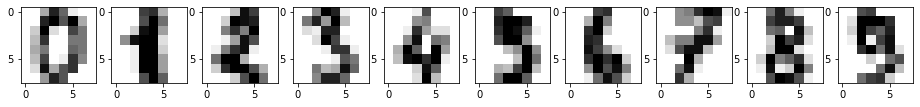

n_samples: [178 182 177 183 181 182 181 179 174 180]


In [2]:
from sklearn.datasets import load_digits

# Load Iris dataset
digits = load_digits()

## print the label species(setosa, versicolor,virginica)
print(digits.target_names)
## print the names of the four features
print(digits.feature_names)

# Affichage des 10 premières images
fig = plt.figure(figsize=(16,6))
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit, cmap='binary')
plt.show()

print("n_samples: %s" % np.bincount(digits.target))


### <font color='red'>*Q1 : Déterminer les descripteurs, les classes et le nombre d'exemples par classe.*</font>
### <font color='red'>*Q2 : Donner un avis sur la qualité des données en comparaisant à la base MNIST exploitée pour le TP clustering.*</font>

## II. Classification avec les Arbres de Décision

In [ ]:
from sklearn import tree

#Accuracy of the model on the whole dataset
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)

print("Accuracy value:","%.0f" %(100*accuracy),"%")

### <font color='red'>*Q3 : Expliquer la valeur de performance obtenue.*</font>

### Dans ce qui suit, partager la base en deux sous-ensemble, apprentissage et test

In [ ]:
from sklearn.model_selection import train_test_split
# 90% of data in the test, 10% for the training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print("Accuracy value:","%.2f" %(100*accuracy),"%")

### <font color='red'>*Q4 : Exécuter la fonction ci-dessus 10 fois. Qu'observez-vous ?*</font>

### Dans ce qui suit, appliquer 100 tirages aléatoires de l'ensemble d'apprentissage et de test. Que conclure ?

In [ ]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    #print(accuracies[i])

print("%.3f" %(100*(np.mean(accuracies))),"%")
print("%.3f" %((np.std(accuracies))))

### Rechercher les meilleurs hyperparamètres avec "GridSearch"

In [ ]:
from sklearn.model_selection import GridSearchCV

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)


pgrid = {"max_depth": [1, 5, 10, 20, 25, 30, 35],
        "min_samples_split": [2, 5, 10, 15, 20]}
accuracies.append(clf.score(X_test,y_test))
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_depth: " + str(grid_search.best_estimator_.max_depth))
print("min_samples_split: " + str(grid_search.best_estimator_.min_samples_split))

## III. Classification avec lesForêts Aléatoires

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print("Accuracy value:","%.2f" %(100*accuracy),"%")

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy1 = clf.score(X_test,y_test)
print("Decision Tree : ""%.2f" %(100*accuracy1),"%")

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
accuracy2 = clf.score(X_test,y_test)
print("Random Forest (200 trees) : ""%.2f" %(100*accuracy2),"%")

### <font color='red'>*Q5 : Comparer la performance de l'arbre de décision à celle de la forêt aléatoire. Expliquer.*</font>


In [ ]:
N = 100
rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print("%.3f" %(100*(np.mean(rf_accuracies))),"%")
print("%.3f" %((np.std(rf_accuracies))))

### <font color='red'>*Q6 : Comparer aux résultats de l'arbre de décision et expliquer en terme de valeur de Accuracy et d'intervalle de confiance.*</font>

In [ ]:
# Plot the graph Accuracy as a function of number of trees
N = 50
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    #print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(50)], accuracy)
plt.ylim((0.8,1))
plt.show()

### <font color='red'>*Q7 : Analyser la courbe obtenue.*</font>
### <font color='red'>*Q8 : Etudier l'impact de la taille de l'ensemble d'apprentissage en analysant le graphe de performance en fonction du nombre d'arbres.*</font>


## IV. Classification avec Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

# AdaBoost basé sur 200 arbres de décision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Accuracy value:","%.2f" %(100*accuracy),"%")

### <font color='red'>*Q9 : Comparer Adaboost à la forêt aléatoire et à l'arbre de décision.*</font>